In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 

from skimage import io, transform
from PIL import Image as im
import cv2

from sklearn import datasets, svm, metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report

In [2]:
# not using this! 
def load_images(folder):
    images = [] 
    labels = []
    for filename in os.listdir(folder):
#         print(filename)
        image = io.imread(os.path.join(folder, filename))
        if image is not None:
            if filename[-5] == 'R':
                images.append(image)
#                 images.append(image)
                labels.append(filename[-6])
            # display_image(image)
    images =  np.asarray(images)
    labels = np.asarray(labels)
    return images, labels

In [3]:
# Loading the images using cv2. This will give us the right dimenstion (5, 32, 32, 3)
def load(folder):
    images = [] 
    labels = [] 
    for filename in os.listdir(folder):
        image = cv2.imread(os.path.join(folder, filename))
        if image is not None:
            if filename[-5] == 'L':
                image = cv2.resize(image, (32,32))
                images.append(image)
                labels.append(filename[-6])
    images =  np.asarray(images)
    labels = np.asarray(labels)
    return images, labels

In [4]:
def display_image(img):
    plt.figure()
    plt.imshow(img) 
    plt.show()  

In [5]:
# X_train, X_test = load_images('./try/')
# X_train.shape

In [6]:
# obtain the training and testing dataset from the data folder
X_train, Y_train = load('./data/train/')
X_test, Y_test = load('./data/test/')

print("X training dataset: ", X_train.shape)
print("Y training dataset: ", Y_train.shape)
print("X testing dataset: ", X_test.shape)
print("Y testing dataset: ", Y_test.shape)

X training dataset:  (9000, 32, 32, 3)
Y training dataset:  (9000,)
X testing dataset:  (1800, 32, 32, 3)
Y testing dataset:  (1800,)


In [7]:
X_train[444].shape
X_train[444]

array([[[47, 47, 47],
        [43, 43, 43],
        [41, 41, 41],
        ...,
        [45, 45, 45],
        [50, 50, 50],
        [50, 50, 50]],

       [[46, 46, 46],
        [45, 45, 45],
        [41, 41, 41],
        ...,
        [52, 52, 52],
        [51, 51, 51],
        [54, 54, 54]],

       [[42, 42, 42],
        [36, 36, 36],
        [38, 38, 38],
        ...,
        [45, 45, 45],
        [48, 48, 48],
        [45, 45, 45]],

       ...,

       [[43, 43, 43],
        [44, 44, 44],
        [43, 43, 43],
        ...,
        [53, 53, 53],
        [49, 49, 49],
        [51, 51, 51]],

       [[48, 48, 48],
        [51, 51, 51],
        [43, 43, 43],
        ...,
        [56, 56, 56],
        [49, 49, 49],
        [50, 50, 50]],

       [[52, 52, 52],
        [45, 45, 45],
        [45, 45, 45],
        ...,
        [52, 52, 52],
        [57, 57, 57],
        [50, 50, 50]]], dtype=uint8)

3


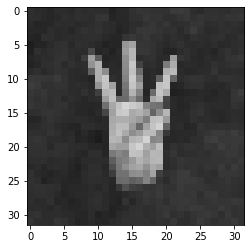

In [8]:
print(Y_train[444])
plt.imshow(X_train[444]);

In [9]:
num_classes = 6

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)

In [10]:
Y_test[0]

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
# CNN model_1 using hw5
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))

model_1.add(Conv2D(32, (3, 3), strides = (2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))
# model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                9

In [13]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_1.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(X_test, Y_test),
              shuffle=True)


# history = model_1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)

Epoch 1/15
282/282 [==============================] - 2s 6ms/step - loss: 1.5107 - accuracy: 0.4121 - val_loss: 0.4696 - val_accuracy: 0.9206
Epoch 2/15
282/282 [==============================] - 1s 3ms/step - loss: 0.6269 - accuracy: 0.7625 - val_loss: 0.1571 - val_accuracy: 0.9606
Epoch 3/15
282/282 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.8692 - val_loss: 0.0721 - val_accuracy: 0.9794
Epoch 4/15
282/282 [==============================] - 1s 3ms/step - loss: 0.2506 - accuracy: 0.9067 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 5/15
282/282 [==============================] - 1s 3ms/step - loss: 0.2123 - accuracy: 0.9196 - val_loss: 0.0272 - val_accuracy: 0.9894
Epoch 6/15
282/282 [==============================] - 1s 3ms/step - loss: 0.1797 - accuracy: 0.9315 - val_loss: 0.0187 - val_accuracy: 0.9950
Epoch 7/15
282/282 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.9408 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 

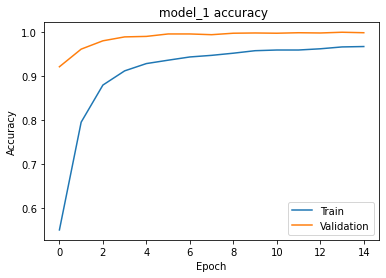

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(' model_1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

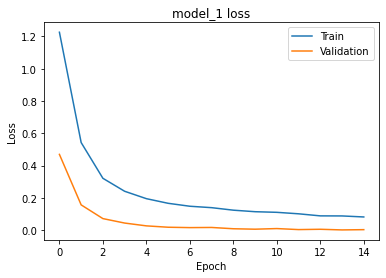

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
score = model_1.evaluate(X_test, Y_test)

57/57 [==============================] - 0s 962us/step - loss: 0.0038 - accuracy: 0.9978


In [17]:
prediction = model_1.predict(X_test)

In [18]:
y_true = np.argmax(Y_test, axis=1)     
y_pred = np.argmax(prediction, axis=1) 

In [19]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true, y_pred))

[[300   0   0   0   0   0]
 [  0 300   0   0   0   0]
 [  0   2 298   0   0   0]
 [  0   0   2 298   0   0]
 [  0   0   0   0 300   0]
 [  0   0   0   0   0 300]]


In [20]:
print(classification_report(y_true, y_pred, digits=3)) 

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       300
           1      0.993     1.000     0.997       300
           2      0.993     0.993     0.993       300
           3      1.000     0.993     0.997       300
           4      1.000     1.000     1.000       300
           5      1.000     1.000     1.000       300

    accuracy                          0.998      1800
   macro avg      0.998     0.998     0.998      1800
weighted avg      0.998     0.998     0.998      1800



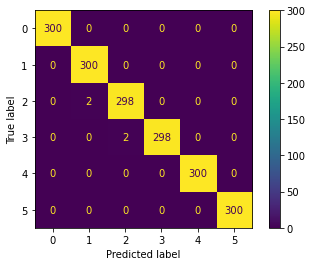

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1', '2', '3', '4', '5'])
cmd.plot()

In [ ]:
# confidence level
# model_1.predict(X_train[0:1], batch_size=None, verbose=0, steps=None)

# check what class it is? 
# Y_train[0:1]

In [ ]:
# Make a prediction with just one image. 
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test_image.png', target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image = test_image/255
display_image(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model_1.predict(test_image)

In [ ]:
## confidence level for each of the classes. highest confidence = largest value
# np.around(result, decimals=1)
result

In [ ]:
## 2nd CNN architecture using VGG-16 ##

In [ ]:
vgg_model = Sequential()

vgg_model.add(Conv2D(64, (5, 5), strides = (1,1), padding='same', input_shape=X_train.shape[1:]))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))
# vgg_model.add(Dropout(0.25))  # No need to use dropout when using batch normalization 
vgg_model.add(BatchNormalization())

vgg_model.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))
# vgg_model.add(Dropout(0.25))
vgg_model.add(BatchNormalization())

vgg_model.add(Conv2D(256, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(256, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))
# vgg_model.add(Dropout(0.25))
vgg_model.add(BatchNormalization())

vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))
# vgg_model.add(Dropout(0.25))
vgg_model.add(BatchNormalization())

vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(Conv2D(512, (3, 3), strides = (1,1), padding='same'))
vgg_model.add(Activation('relu'))
vgg_model.add(MaxPooling2D(pool_size=(2, 2)))
# # vgg_model.add(Dropout(0.5))
vgg_model.add(BatchNormalization())

vgg_model.add(Flatten())
vgg_model.add(Dense(512))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(num_classes))

vgg_model.add(Dense(4096))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(num_classes))

vgg_model.add(Dense(1000))
vgg_model.add(Activation('relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(num_classes))

vgg_model.add(Activation('softmax'))

vgg_model.summary()

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

vgg_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

vgg_model.fit(X_train, Y_train,
              batch_size=32,
              epochs=5,
              validation_data=(X_test, Y_test),
              shuffle=True)

In [ ]:
'''
References 
 - https://github.com/evernext10/Hand-Gesture-Recognition-Machine-Learning
 - https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

'''